In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

# Support Vector Machine Assignment

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

<IPython.core.display.Javascript object>

### Import the admissions data set (admissions.csv).

In [4]:
data = pd.read_csv(
    "https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/admissions.csv"
)
data.head()

,GRE,TOEFL,SchoolRank,SOP,LOR,GPA,Research,Admitted
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,1
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0


<IPython.core.display.Javascript object>

## Data Exploration

Before jumping into training a model on the data, let's explore it to get a better sense of the relationships between our features and the target variable.

### Call the Pandas `describe()` method on the data frame to get view the average values and variability for each variable.

In [5]:
data.describe()

,GRE,TOEFL,SchoolRank,SOP,LOR,GPA,Research,Admitted
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.617500
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.486606
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.000000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.000000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,1.000000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,1.000000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,1.000000


<IPython.core.display.Javascript object>

### Group the data by the Admitted field and compute the average values for each field.

In [8]:
group = data.groupby("Admitted")
group.mean()

,GRE,TOEFL,SchoolRank,SOP,LOR,GPA,Research
Admitted,,,,,,,
0,307.013072,102.588235,2.261438,2.741830,2.875817,8.087974,0.248366
1,322.874494,110.396761,3.599190,3.807692,3.809717,8.915425,0.732794


<IPython.core.display.Javascript object>

### How many students that applied were admitted vs. not admitted? What percentage of students were admitted vs. not admitted? 

In [25]:
admit = data["Admitted"] == 1
admit.sum() / 400

0.6175

<IPython.core.display.Javascript object>

### What percent of students with research experience were admitted?

### What percent of students admitted had research experience?

### Generate a grouped bar chart showing the number of admissions by SOP score, with separate bars for admitted and not admitted.

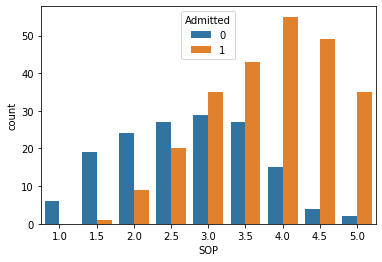

<IPython.core.display.Javascript object>

In [26]:
sns.countplot(x=data["SOP"], hue=data["Admitted"])
plt.show()

### Generate a grouped bar chart showing the number of admissions by LOR score, with separate bars for admitted and not admitted.

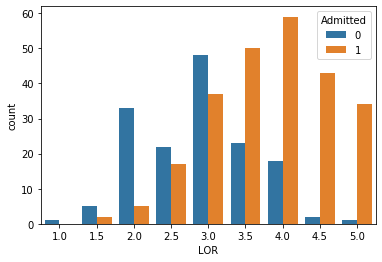

<IPython.core.display.Javascript object>

In [27]:
sns.countplot(x=data["LOR"], hue=data["Admitted"])
plt.show()

### Generate a scatter plot where the axes are GRE and TOEFL fields and the data points are color-coded by whether the student was admitted.

Think about how you might go about determining the decision boundary to separate admitted from non-admitted students.

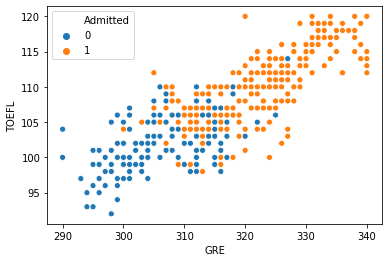

<IPython.core.display.Javascript object>

In [28]:
sns.scatterplot(x=data["GRE"], y=data["TOEFL"], hue=data["Admitted"])
plt.show()

### Generate a scatter plot where the axes are GRE and GPA fields and the data points are color-coded by whether the student was admitted.

Think about how you might go about determining the decision boundary to separate admitted from non-admitted students.

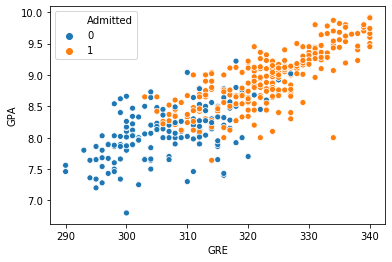

<IPython.core.display.Javascript object>

In [29]:
sns.scatterplot(x=data["GRE"], y=data["GPA"], hue=data["Admitted"])
plt.show()

## Model Training and Evaluation

Now that we have gained a sense of familiarity with our data, let's train a model to predict admissions.

### Split the data into a training and test sets, where the test set contains 20% of the data.

In [30]:
X = data.drop(columns=["Admitted"])
y = data["Admitted"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=13
)

<IPython.core.display.Javascript object>

### Use the linear kernel to train a Support Vector Classifier (SVC) model on the training data. Report the scores for both the training and test data.

In [32]:
model = SVC(kernel="linear")
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

<IPython.core.display.Javascript object>

In [33]:
model.score(X_train, y_train)

0.89375

<IPython.core.display.Javascript object>

In [34]:
model.score(X_test, y_test)

0.8375

<IPython.core.display.Javascript object>

### Generate a classification report for the SVC model you trained.

How do the evaluation metrics differ across classes?

In [39]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.75      0.81        36
           1       0.82      0.91      0.86        44

    accuracy                           0.84        80
   macro avg       0.84      0.83      0.83        80
weighted avg       0.84      0.84      0.84        80



<IPython.core.display.Javascript object>